
# Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler , LabelEncoder

from sklearn.metrics import r2_score

# 1.Understanding and Visualizing the data

In [3]:
cars = pd.read_csv('CarPrice_Assignment (3).csv')
backup_cars = cars.copy()
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.shape

(205, 26)

In [5]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
cars.CarName.head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [7]:
cars.CarName = cars.CarName.apply(lambda x: x.split()[0])

In [8]:
cars.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
#Treating spelling errors

#maxda to mazda
cars.CarName[cars.CarName  == 'maxda'] = 'mazda'

#Nissan to nissan
cars.CarName[cars.CarName  == 'Nissan'] = 'nissan'

#porcshce to porsche
cars.CarName[cars.CarName  == 'porcshce'] = 'porsche'

#toyouta to toyota
cars.CarName[cars.CarName  == 'toyouta'] = 'toyota'

#vokswagen and vs to volkswagen
cars.CarName[(cars.CarName  == 'vokswagen') | (cars.CarName  == 'vw')] = 'volkswagen'

In [10]:
cars.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
#Differenciating categorical variables and numerical variables
cars.columns

numvars = ['symboling','wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 
           'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

catvars = [ 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation','cylindernumber',
       'enginetype', 'fuelsystem', ]

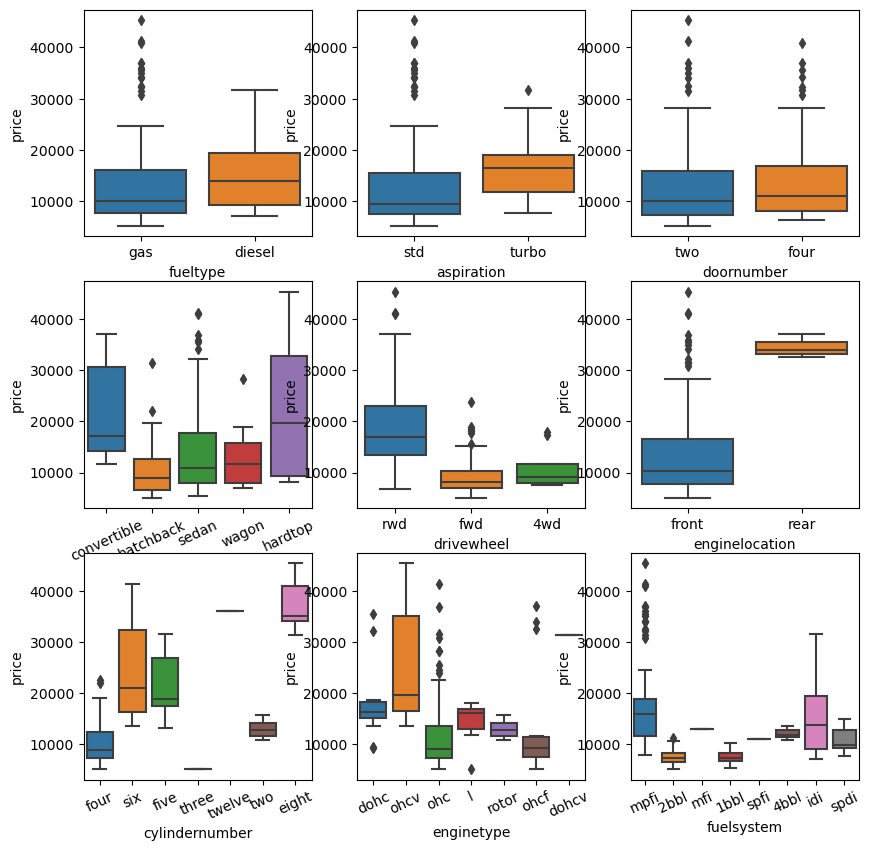

In [12]:
#Visualizing categorical variables except carname
fig , axes = plt.subplots(3 , 3 , figsize = [10 , 10])

sns.boxplot(ax = axes[0,0] , data = cars , x = cars.fueltype , y = cars.price)
sns.boxplot(ax = axes[0,1] , data = cars , x = cars.aspiration , y = cars.price)
sns.boxplot(ax = axes[0,2] , data = cars , x = cars.doornumber , y = cars.price)
sns.boxplot(ax = axes[1,0] , data = cars , x = cars.carbody , y = cars.price)
axes[1,0].tick_params(axis = 'x', labelrotation = 25)

sns.boxplot(ax = axes[1,1] , data = cars , x = cars.drivewheel , y = cars.price)
sns.boxplot(ax = axes[1,2] , data = cars , x = cars.enginelocation , y = cars.price)
sns.boxplot(ax = axes[2,0] , data = cars , x = cars.cylindernumber , y = cars.price)
axes[2,0].tick_params(axis = 'x', labelrotation = 25)
sns.boxplot(ax = axes[2,1] , data = cars , x = cars.enginetype , y = cars.price)
axes[2,1].tick_params(axis = 'x', labelrotation = 25)
sns.boxplot(ax = axes[2,2] , data = cars , x = cars.fuelsystem , y = cars.price)
axes[2,2].tick_params(axis = 'x', labelrotation = 25)


# 2.Preparing data for modelling

In [13]:
cars.doornumber.unique()

array(['two', 'four'], dtype=object)

In [14]:
def alter(x):
    if x == 'two':
        x = 1
    else:
        x = 0
    return x

cars.doornumber = cars.doornumber.apply(lambda x : alter(x))

In [15]:
#creating a numbers dictionary with the unique values and modifying them in the data frame
numbers = {'four' : 4 , 'six':6 , 'five':5 , 'eight': 8 , 'two' : 2 , 'three' : 3 , 'twelve' : 12}
cars.cylindernumber = cars.cylindernumber.apply( lambda x : numbers.get(x))

In [16]:
#Label encoding - 1. cylindernumber
label_encoders = {}
for column in cars.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    cars[column] = label_encoders[column].fit_transform(cars[column])

In [17]:
cars.dtypes

car_ID                int64
symboling             int64
CarName               int32
fueltype              int32
aspiration            int32
doornumber            int64
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int64
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Splitting the train and test data

In [18]:
df_train , df_test = train_test_split(cars , train_size = 0.80 , random_state = 7)

In [19]:
#viewing the train and test data shape
print('Train data shape : ' , df_train.shape , '\nTest data shape  : ' , df_test.shape)

Train data shape :  (164, 26) 
Test data shape  :  (41, 26)


In [20]:
#Using the Standardisation method on the numerical variables
scaler = StandardScaler()

#taking the column names as a list
column_names = list(df_train.columns)

#fitting and transforming the data using scaling    
df_train = pd.DataFrame(scaler.fit_transform(df_train))

#converting the array to the dataframe
df_train = pd.DataFrame(df_train)

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.172724,-0.653324,0.182756,0.317287,-0.482786,-0.873751,1.552697,1.191318,-0.111111,2.443162,...,-0.186511,0.895216,0.509967,-0.248415,-0.431875,-0.204704,-0.245127,-0.930146,-0.946702,-0.116818
1,-0.656929,-0.653324,-0.454947,0.317287,-0.482786,-0.873751,0.410803,-0.634627,-0.111111,-0.023932,...,-0.138978,-1.082096,0.248375,0.397996,-0.379665,-0.527029,-0.668293,0.113654,0.190727,-0.610653
2,0.460563,1.745449,0.501608,0.317287,-0.482786,1.144491,-1.872985,1.191318,9.000000,-1.513801,...,1.572231,0.895216,1.556334,-1.185709,-0.144722,2.522663,1.659121,-1.228375,-0.804523,2.397797
3,-1.215674,0.146267,-1.092649,0.317287,2.071309,1.144491,0.410803,-0.634627,-0.111111,-0.840957,...,-0.709381,0.895216,-1.096953,0.397996,-0.640713,-0.080732,0.812789,-0.184575,-0.093630,-0.602766
4,-0.995563,-0.653324,-0.933224,0.317287,-0.482786,-0.873751,0.410803,-0.634627,-0.111111,-0.392395,...,-0.424179,-1.576424,-0.648510,1.012085,-0.275246,-0.477440,1.447538,0.262769,0.332906,-0.385329


# 3. Training the model

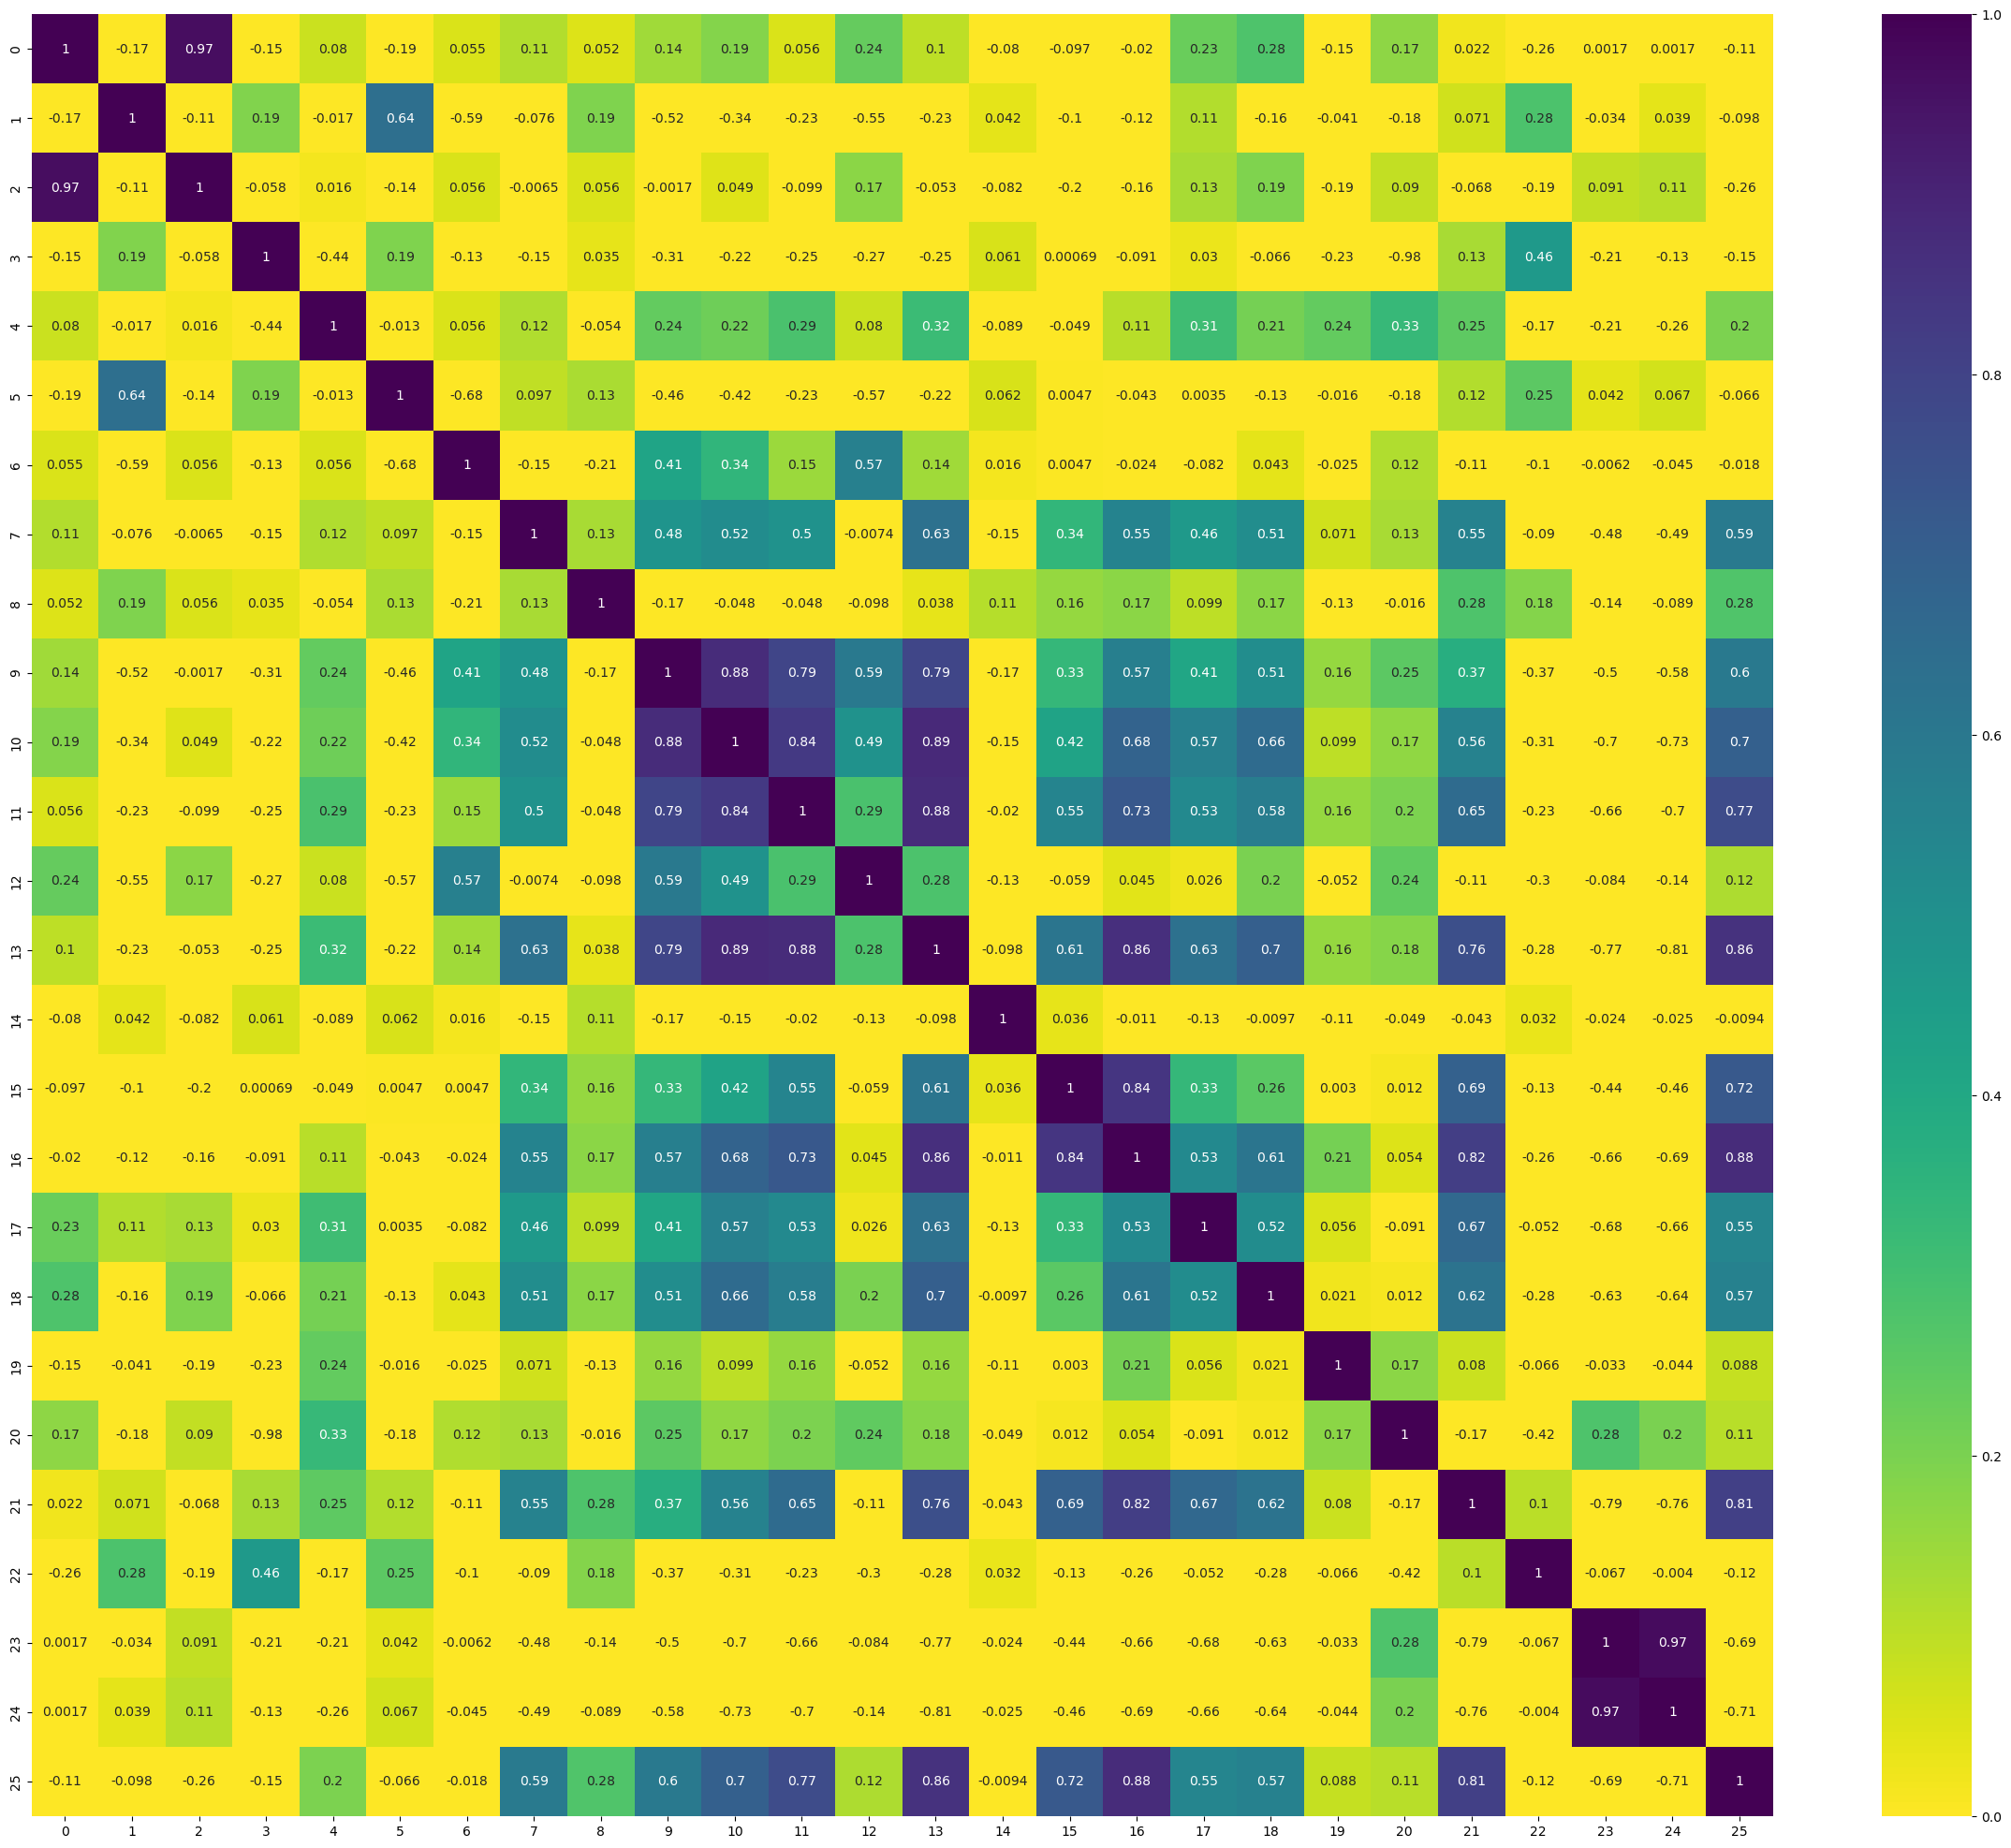

In [21]:
#plotting heatmap on the correlation
plt.figure(figsize = [30,25])
sns.heatmap(df_train.corr() , cmap = 'viridis_r' , vmin = 0 , annot = True)
plt.show()

In [27]:
#Splitting the dependent and independent variables
x=cars.drop('price',axis=1)
y=cars['price']

In [28]:
x_train ,x_test, y_train, y_test = train_test_split(x,y , train_size = 0.80 , random_state = 7)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

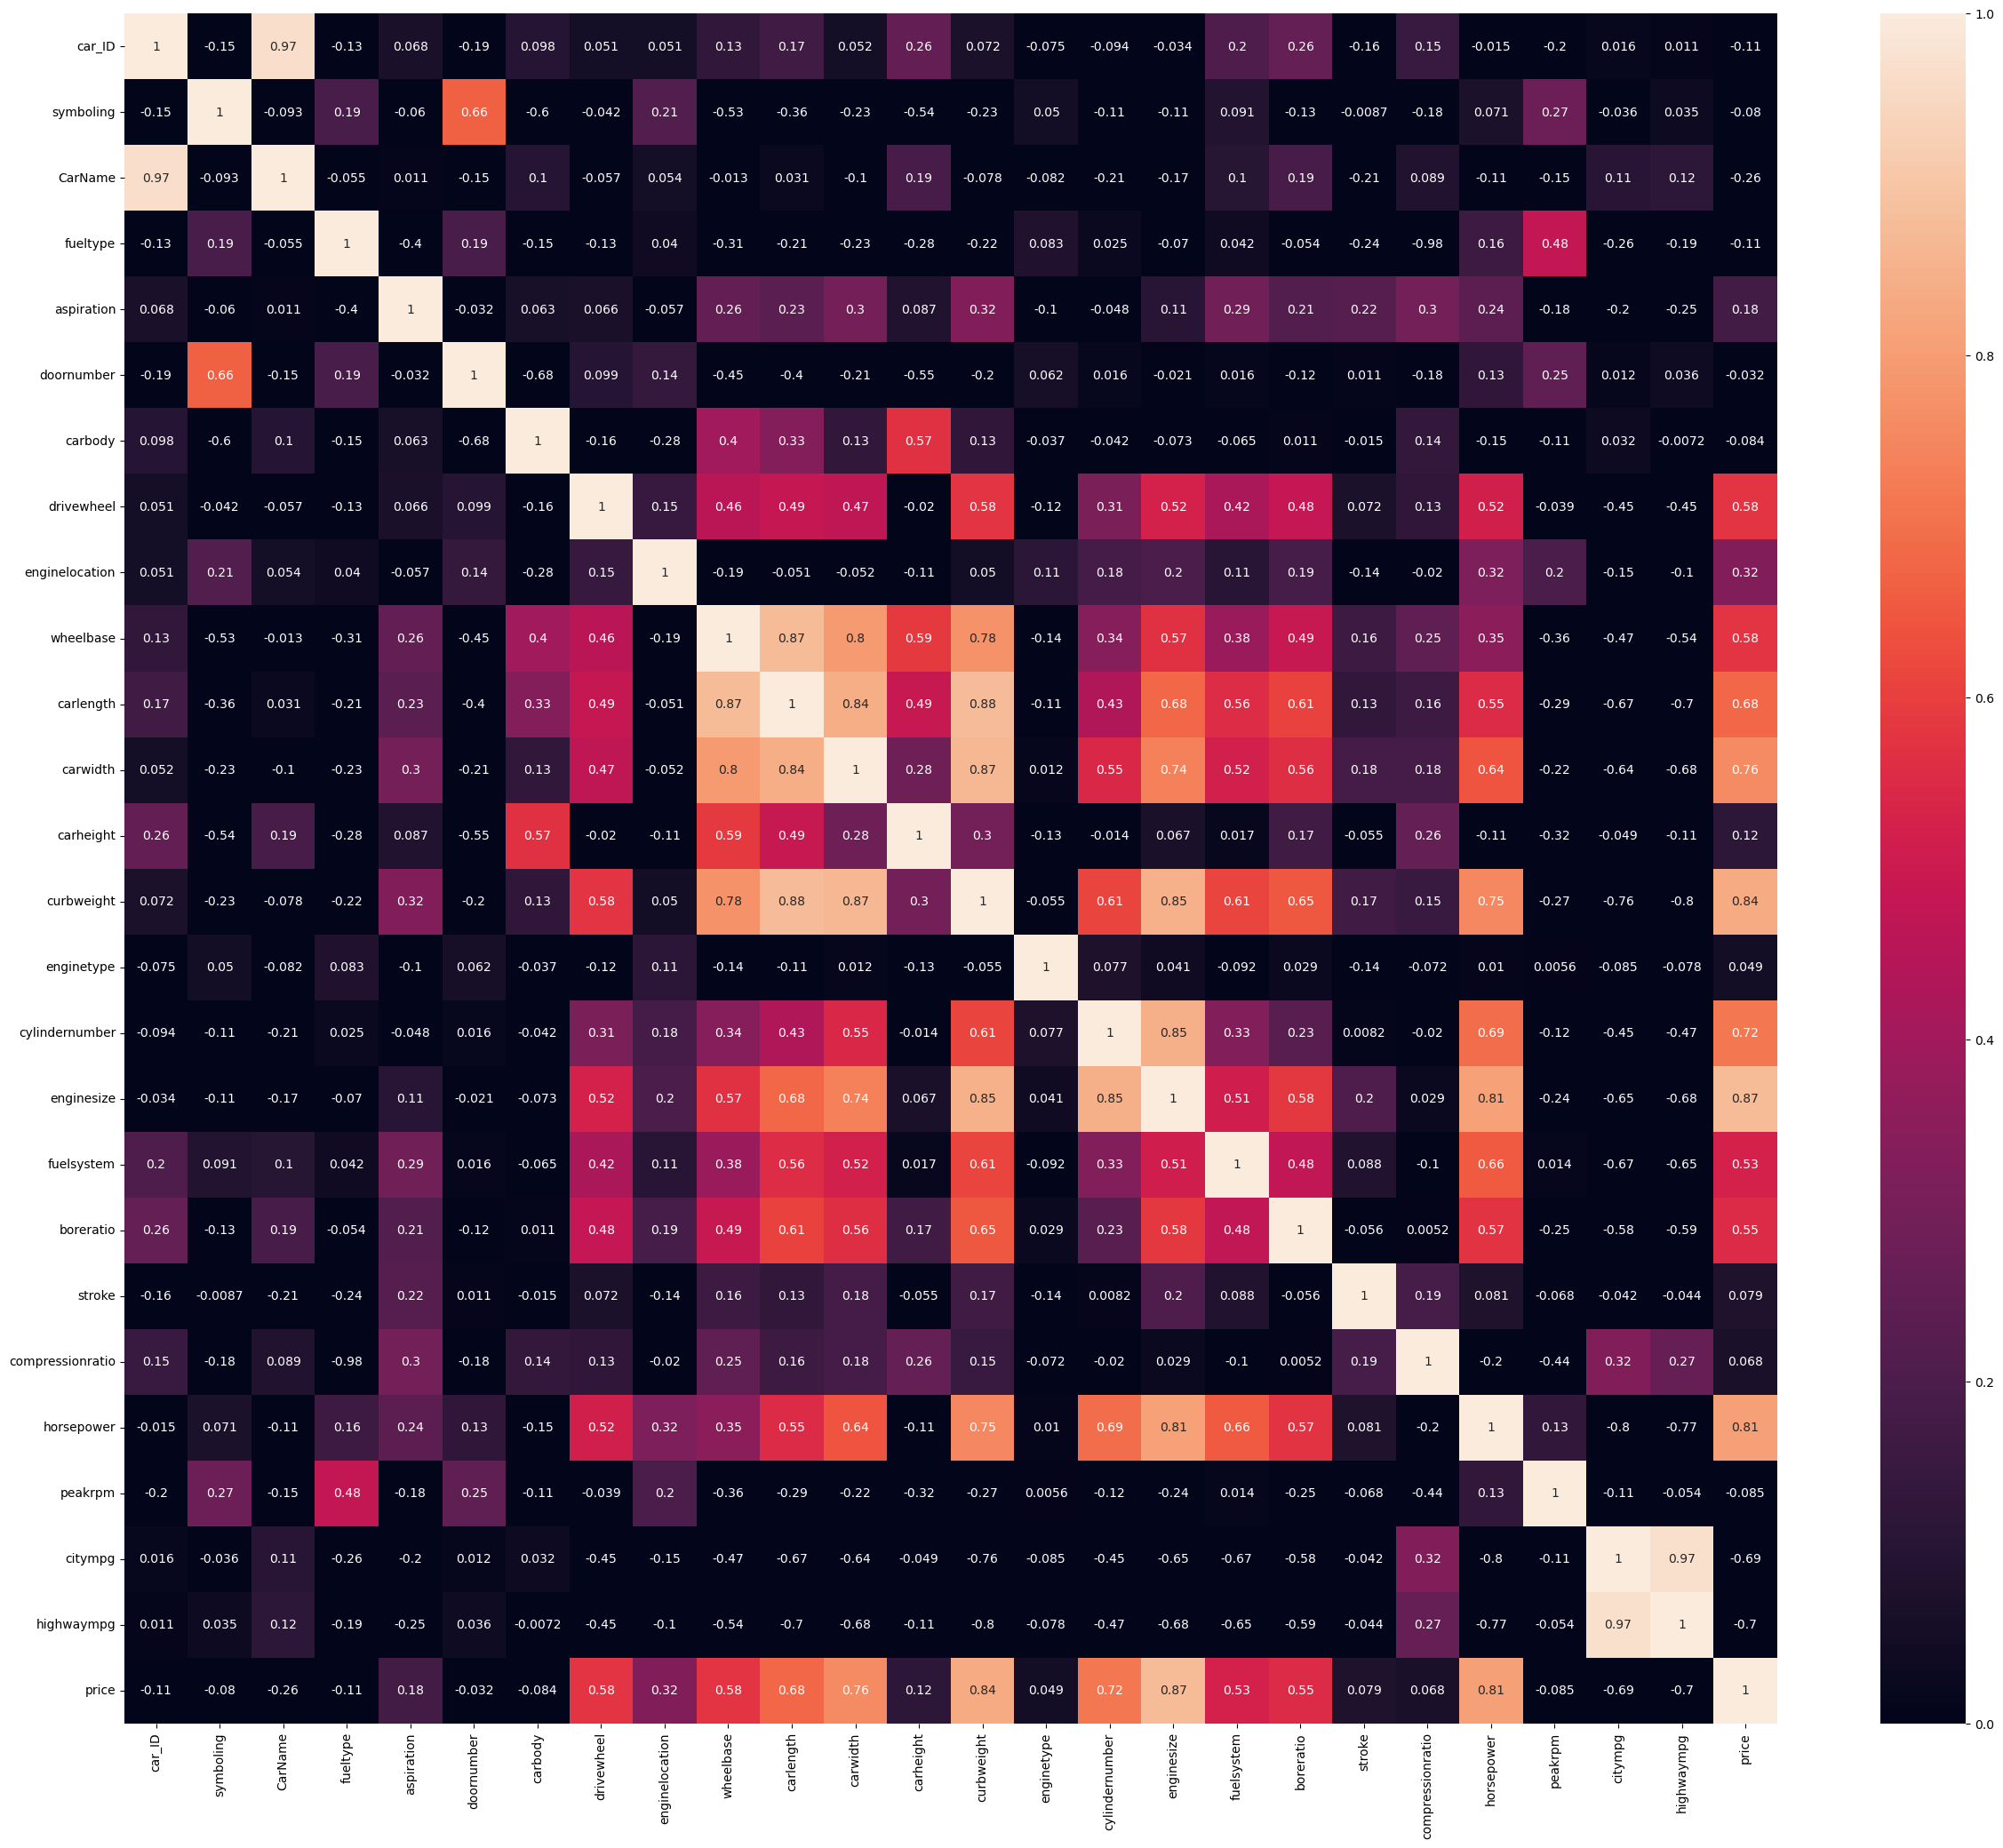

In [30]:
plt.figure(figsize=[30,25])
sns.heatmap(cars.corr(),vmin = 0,annot=True)
plt.show()

In [31]:
x_train_sm=sm.add_constant(x_train)

lt=sm.OLS(y_train,x_train_sm)

model=lt.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     57.62
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           9.11e-61
Time:                        20:11:27   Log-Likelihood:                -1506.5
No. Observations:                 164   AIC:                             3065.
Df Residuals:                     138   BIC:                             3146.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.337e+04    201.061     66.513      0.000     1.3e+04    1.38e+04
x1          3380.5806   1275.331      2.651      0.009     858.864    5902.298
x2           -77.5899    350.577     -0.221      0.825    -770.787     615.607
x3         -5008.9861   1270.844     -3.941      0.000   -7521.831   -2496.142
x4           -26.7398   2142.760     -0.012      0.990   -4263.627    4210.147
x5          -263.7391    400.279     -0.659      0.511   -1055.211     527.733
x6          -174.5864    353.602     -0.494      0.622    -873.765     524.593
x7          -499.4203    364.645     -1.370      0.173   -1220.435     221.594
x8           -21.3822    347.952     -0.061      0.951    -709.390     666.625
x9          1186.2585    257.506      4.607      0.000     677.091    1695.426
x10          391.1237    670.596      0.583      0.561    -934.848    1717.096
x11          426.6192    745.825      0.572      0.568   -1048.103    1901.341
x12          405.2346    589.201      0.688      0.493    -759.794    1570.263
x13          414.9370    349.252      1.188      0.237    -275.639    1105.513
x14         2442.1712   1136.906      2.148      0.033     194.162    4690.180
x15          205.8428    241.468      0.852      0.395    -271.614     683.299
x16         -883.7434    756.581     -1.168      0.245   -2379.734     612.248
x17         2618.3776   1211.708      2.161      0.032     222.462    5014.293
x18          -68.9186    339.623     -0.203      0.839    -740.457     602.620
x19         -841.4218    442.826     -1.900      0.060   -1717.022      34.179
x20         -873.7544    287.921     -3.035      0.003   -1443.062    -304.446
x21          418.9130   2003.140      0.209      0.835   -3541.903    4379.729
x22         3162.5607    830.245      3.809      0.000    1520.914    4804.207
x23           63.1140    338.166      0.187      0.852    -605.543     731.770
x24          242.7643   1197.548      0.203      0.840   -2125.151    2610.680
x25          618.6506   1112.875      0.556      0.579   -1581.842    2819.143
==============================================================================
Omnibus:                       43.366   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.517
Skew:                           0.794   Prob(JB):                     7.21e-52
Kurtosis:                       8.652   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""